# 2. 어떻게 만들까? 사진 준비하기

In [3]:
# 폴더 만들기
!mkdir -p ~/work/project/Exploration/Quest03/camera_sticker/models
!mkdir -p ~/work/project/Exploration/Quest03/camera_sticker/images

In [7]:
# 본인 얼굴 이미지 저장
#!wget https://d3s0tskafalll9.cloudfront.net/media/images/E-8-6.max-800x600_rkMHa4K.png # 기본 제공 이미지입니다. 여러분만의 이미지로 수정해보세요!
#!mv E-8-6.max-800x600_rkMHa4K.png ~/work/project/Exploration/Quest03/camera_sticker/images/image.png

In [5]:
# 얼굴에 쓰일 이미지도 저장
!wget https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-3.png
!wget https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-4.png
!mv E-8-3.png ~/work/project/Exploration/Quest03/camera_sticker/images/king.png
!mv E-8-4.png ~/work/project/Exploration/Quest03/camera_sticker/images/hero.png

--2025-10-21 10:40:39--  https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-3.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 18.172.21.96, 18.172.21.36, 18.172.21.106, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|18.172.21.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511 (13K) [image/png]
Saving to: ‘E-8-3.png’

E-8-3.png           100%[===================>]  13.19K  --.-KB/s    in 0.001s  

2025-10-21 10:40:39 (20.8 MB/s) - ‘E-8-3.png’ saved [13511/13511]

--2025-10-21 10:40:40--  https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-4.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 18.172.21.36, 18.172.21.106, 18.172.21.4, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|18.172.21.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42963 (42K) [image/png]
Saving to: ‘E-8-4.png

In [8]:
#!pip install cmake
#!pip install opencv-python
#!conda install -y dlib

In [9]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

- [OpenCV-Python Study documentation!](https://opencv-python.readthedocs.io/en/latest/index.html)

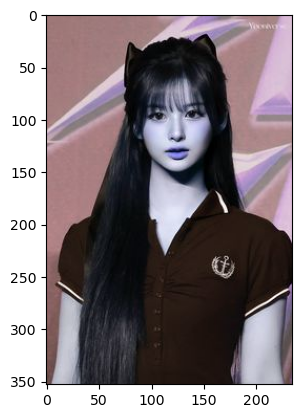

In [67]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/project/Exploration/Quest03/camera_sticker/images/image.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력) 
# 참고로 기존 순서는 (R,G,B)인데, cv는 (B,G,R)이니 순서를 바꿔야 한다.

# cv2.imread(my_image_path, k) 
# cv2.IMREAD_COLOR : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다. k=0
# cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다. k=1
# cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다. k=2

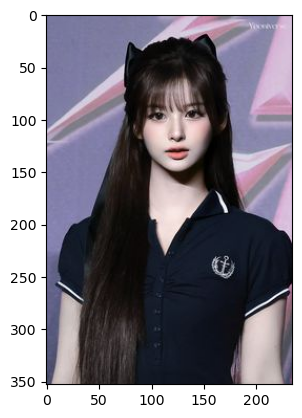

In [68]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

# 3. 얼굴 검출 face detection

- dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾는다.

- HOG는 이미지에서 색상의 변화량을 나타낸 것

- 알고리즘 단계
    - (선택 사항) 글로벌 이미지 정규화
        - 목적: 조명 효과나 명암 대비 변화의 영향을 줄이기 위함.
        - 방법: 각 색상 채널의 제곱근(sqrt) 또는 로그(log) 연산을 적용하는 감마 압축(Gamma Compression) 사용.
        - 결과적으로 국소적인 조명 차이나 그림자의 영향을 완화함.
    - x와 y의 그래디언트 이미지 계산
        - x, y 방향 1차 미분을 이용해 각 픽셀의 그래디언트 크기와 방향을 구함.
        - 그래디언트는 윤곽선(Edge), 실루엣(Silhouette) 등의 정보를 포착하며 조명 변화에 덜 민감함.
        - 경우에 따라 2차 미분값도 포함해, 막대형 구조(예: 사람의 팔, 자전거 프레임 등)를 더 잘 탐지.
    - 그래디언트 히스토그램 계산
        - 이미지를 셀(Cell) 단위의 작은 구역으로 나눔.
        - 각 셀에서 모든 픽셀의 그래디언트 방향을 히스토그램으로 누적.
        - 각 히스토그램은 일정 각도 범위를 여러 빈(bin) 으로 나눈 후, 그래디언트 크기(Magnitude) 를 가중치로 하여 투표(Voting).
        - 결과적으로 셀 단위의 방향성 분포를 표현.
    - 블록 간 정규화
        - 여러 개의 셀을 블록(Block) 단위로 묶어 정규화 수행.
        - 조명, 그림자, 대비 변화에 더 강인한 특징을 만듦.
        - 하나의 셀은 여러 블록에 포함될 수 있어, 서로 다른 정규화 결과로 중복 표현됨 → 성능 향상 효과.
        - 정규화된 블록 기술자를 HOG 디스크립터라 함.
    - 특징 벡터로 평탄화
        - 감지 창(Detection window)을 겹치도록 슬라이딩하면서
        - 모든 블록의 HOG 디스크립터를 하나의 벡터로 평탄화(flatten).
        - 이렇게 만들어진 벡터가 분류기(예: SVM) 입력으로 사용되어 물체 인식에 활용됨.

- [아래 이미지](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)
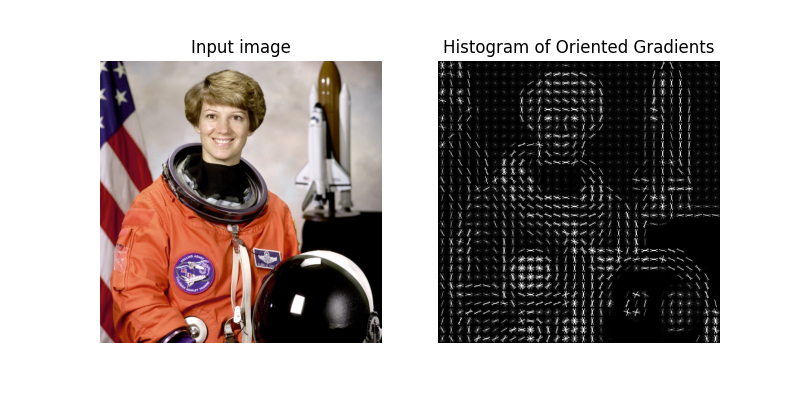




- [공돌이의 수학정리노트 - SVM](https://angeloyeo.github.io/2020/09/30/SVM.html)
- HOG를 통해 만든 벡터로 SVM이 잘 돌아간다.
- iding window는 작은 영역(window)을 이동해가며 확인하는 방법
- 큰 이미지의 작은 영역을 잘라 얼굴이 있는지 확인하고, 다시 작은 영역을 옆으로 옮겨 얼굴이 있는지 확인하는 방식
  
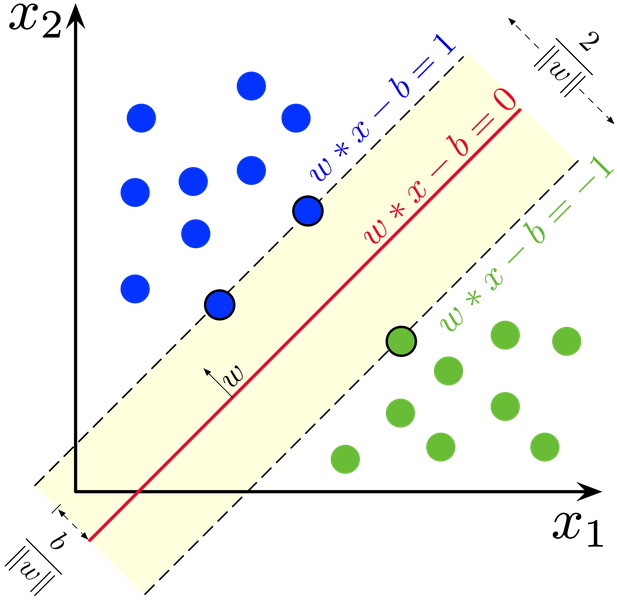

In [70]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [71]:
# dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
                                        # Image Pyramid의 종류는 1) Gaussian Pyramids 와 2) Laplacian Pyramids
                                        # https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html

rectangles[[(93, 80) (156, 142)]]


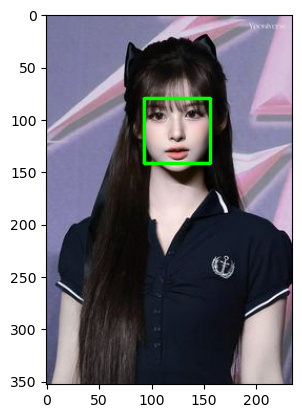

In [72]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    # dlib_rect에는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수 존재
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 4. 얼굴 랜드마크 face landmark

-  이목구비의 위치를 추론하는 것을 face landmark localization 기술
-  detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용

## Object keypoint estimation 알고리즘
- Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation
  
- keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.
    - top-down : bounding box를 찾고 box 내부의 keypoint를 예측
    - bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾음.

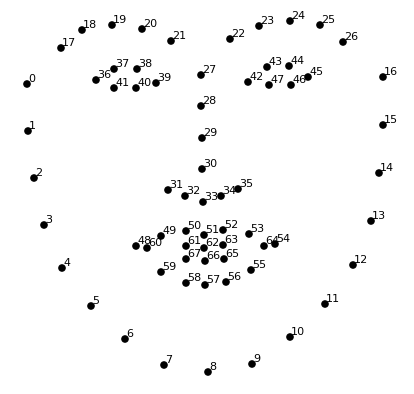

In [28]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/project/Exploration/Quest03/camera_sticker/models
!cd ~/work/project/Exploration/Quest03/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2025-10-21 11:16:52--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-21 11:16:52--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.2MB/s    in 4.8s    

2025-10-21 11:16:58 (12.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [73]:
model_path = os.path.join(home_dir, 'work/project/Exploration/Quest03/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [74]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [76]:
print(list_landmarks)

[[(89, 99), (90, 108), (91, 117), (93, 125), (97, 133), (103, 139), (109, 145), (117, 149), (125, 150), (133, 148), (140, 144), (147, 138), (152, 131), (155, 123), (157, 114), (158, 105), (158, 96), (93, 92), (98, 88), (104, 87), (111, 88), (117, 90), (127, 89), (133, 86), (140, 84), (147, 85), (152, 89), (123, 96), (123, 102), (124, 109), (124, 115), (118, 120), (121, 120), (124, 121), (127, 120), (129, 119), (100, 98), (104, 95), (109, 95), (113, 99), (109, 100), (104, 100), (133, 97), (136, 93), (141, 93), (146, 95), (142, 98), (137, 98), (113, 132), (117, 128), (121, 126), (124, 127), (127, 126), (131, 127), (135, 130), (132, 135), (128, 137), (125, 138), (121, 137), (117, 136), (115, 131), (121, 130), (124, 130), (127, 130), (133, 130), (128, 131), (125, 132), (121, 132)]]


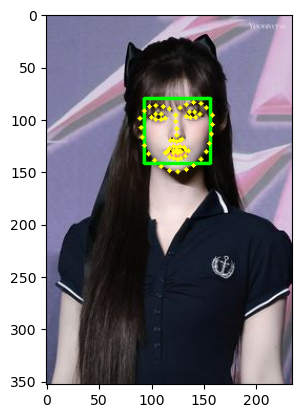

In [75]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

# 5. 스티커 적용하기

- 스티커 위치 x= x_nose, y = y_nose - height/2
    - 위 이미지를 보듯이, 상단이 0으로 시작하기에 코 부분에서 height를 2로 나눠줬다.
- 스티커 크기 width = height = width_bbox

In [77]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(93, 80) (156, 142)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (f'코의 중심점 : {landmark[30]}') # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//1 # 본 수업 이미지와 크기나 위치가 상대적으로 다르게 나오다 보니 2가 아니라 1로 둠.
                                                # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (124, 115-(65+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로 픽셀 수 (156 - 93 + 1 = 64) → max(x) - min(x) + 1 (픽셀은 점 하나로도 1이므로 +1)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

코의 중심점 : (124, 115)
(x,y) : (124,52)
(w,h) : (64,64)


In [78]:
sticker_path = os.path.join(home_dir, 'work/project/Exploration/Quest03/camera_sticker/images/king.png') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(64, 64, 3)


In [79]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 중심의 x좌표 = 124
# y는 이미지에서 코 중심의 y좌표 = 52
# w는 얼굴 영역의 가로 픽셀 수 = 64
# h는 얼굴 영역의 세로 픽셀 수 = 64
refined_x = x - w // 2 # 124 - (64 // 2) = 124 - 32 = 92
refined_y = y - h # 52 - 64 = -12
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (92,-12)


In [80]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -12이라면, img_sticker[12: , :]가 된다. (64, 64, 3)에서 (52, 64, 3)이 됨 (64개 중에서 12개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (92,0)


In [81]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (92,0) 부터 (92+64, 0+52) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+52, 92:92+64]
# img_show[0:52, 92:156]
# 즉, x좌표는 92~156 / y좌표는 0~52가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

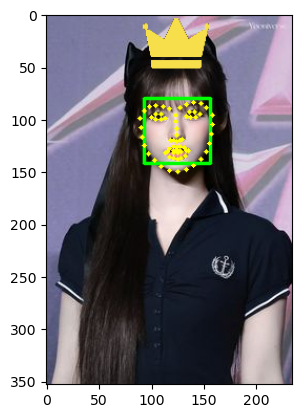

In [82]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

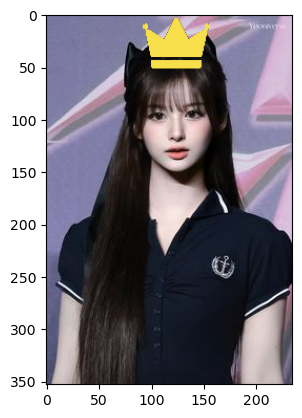

In [83]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 위에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()